In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
db = pd.read_csv("loan_prediction.csv")

In [3]:
db.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
db.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
db.shape

(614, 13)

In [6]:
db.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

# Exploratory data analysis

In [7]:
db.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
db.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### check and remove skewness from dataset by using feature transformation

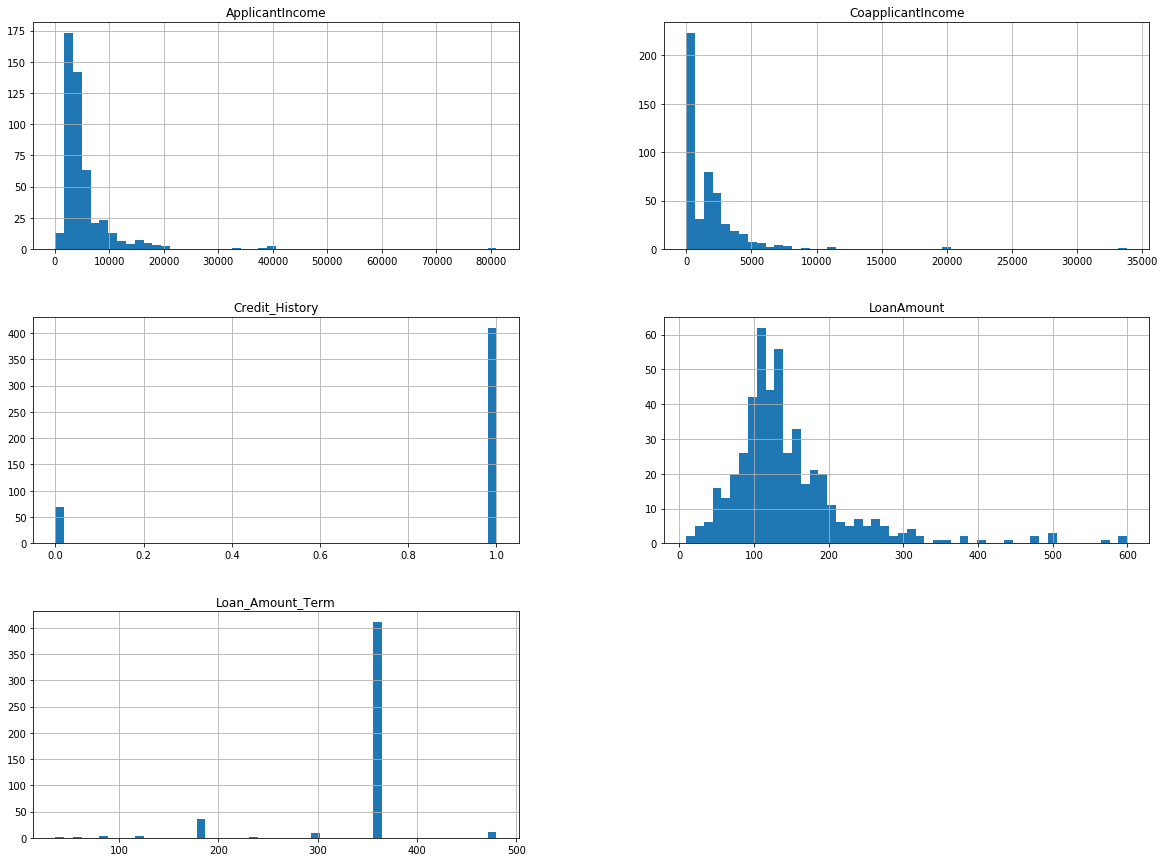

In [9]:
db.dropna().hist(bins=50,figsize=(20,15))
plt.show()

here,we can see that the 'LoanAmount', 'ApplicantIncome' and 'CoapplicantIncome' are suffering from right skewness..

In [10]:
print('Skewness: %f' % db['LoanAmount'].skew())
print('Kurtsis: %f' % db['LoanAmount'].kurt())

Skewness: 2.677552
Kurtsis: 10.401533


Text(0.5, 0, 'cube_root-LoanAmount')

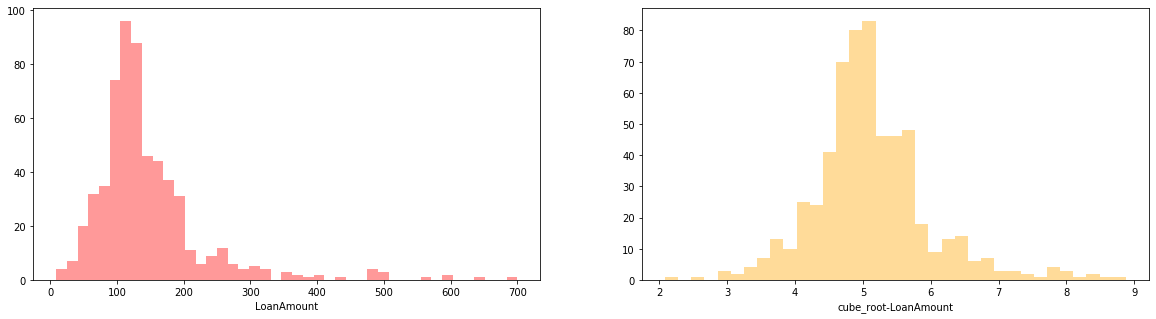

In [11]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.distplot(db.LoanAmount.dropna(), ax=ax[0], kde=False, color="red")
sns.distplot(np.cbrt(db.LoanAmount.dropna()), ax=ax[1], bins=35, color="orange", kde=False)
ax[1].set_xlabel("cube_root-LoanAmount")

In [12]:
print('Skewness: %f' % np.cbrt(db.LoanAmount.dropna()).skew())
print('Kurtsis: %f' % np.cbrt(db.LoanAmount.dropna()).kurt())

Skewness: 0.837614
Kurtsis: 2.617831


In [13]:
print('Skewness: %f' % db['ApplicantIncome'].skew())
print('Kurtsis: %f' % db['ApplicantIncome'].kurt())

Skewness: 6.539513
Kurtsis: 60.540676


Text(0.5, 0, 'log-ApplicantIncome')

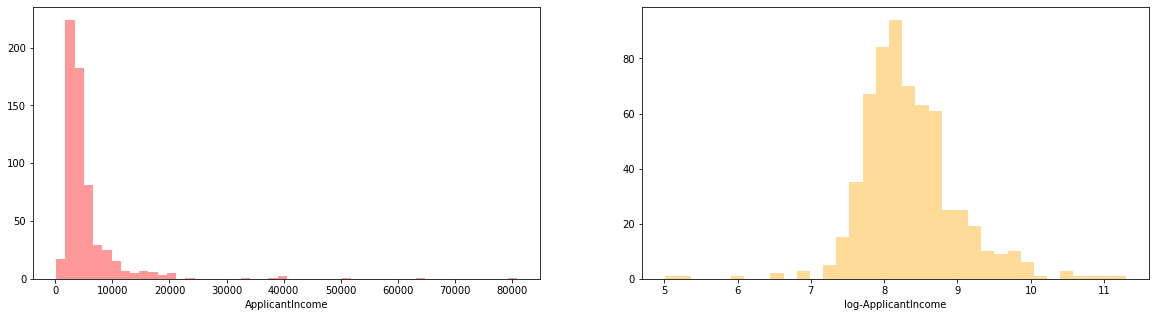

In [14]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.distplot(db.ApplicantIncome.dropna(), ax=ax[0], kde=False, color="red")
sns.distplot(np.log(db.ApplicantIncome.dropna()), ax=ax[1], bins=35, color="orange", kde=False)
ax[1].set_xlabel("log-ApplicantIncome")

In [15]:
print('Skewness: %f' % np.cbrt(db.ApplicantIncome.dropna()).skew())
print('Kurtsis: %f' % np.cbrt(db.ApplicantIncome.dropna()).kurt())

Skewness: 2.083638
Kurtsis: 8.304010


In [16]:
print('Skewness: %f' % db['CoapplicantIncome'].skew())
print('Kurtsis: %f' % db['CoapplicantIncome'].kurt())

Skewness: 7.491531
Kurtsis: 84.956384


Text(0.5, 0, 'cube-CoapplicantIncome')

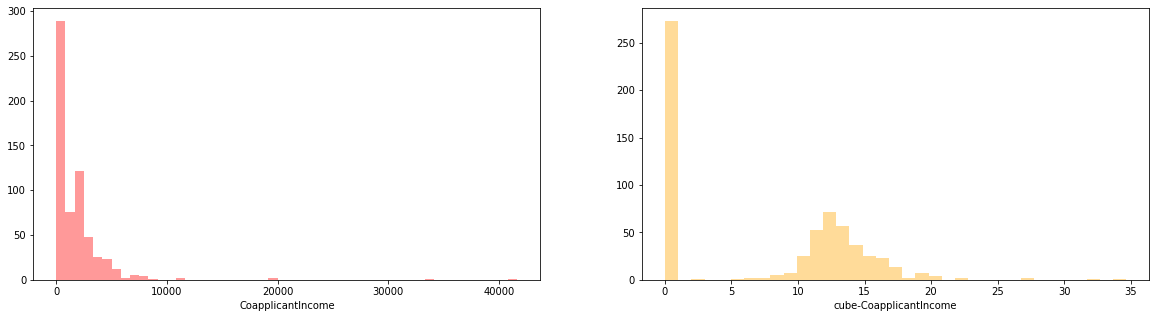

In [17]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.distplot(db.CoapplicantIncome.dropna(), ax=ax[0], kde=False, color="red")
sns.distplot(np.cbrt(db.CoapplicantIncome.dropna()), ax=ax[1], bins=35, color="orange", kde=False)
ax[1].set_xlabel("cube-CoapplicantIncome")

In [18]:
print('Skewness: %f' % np.cbrt(db.CoapplicantIncome.dropna()).skew())
print('Kurtsis: %f' % np.cbrt(db.CoapplicantIncome.dropna()).kurt())

Skewness: 0.196726
Kurtsis: -1.057728


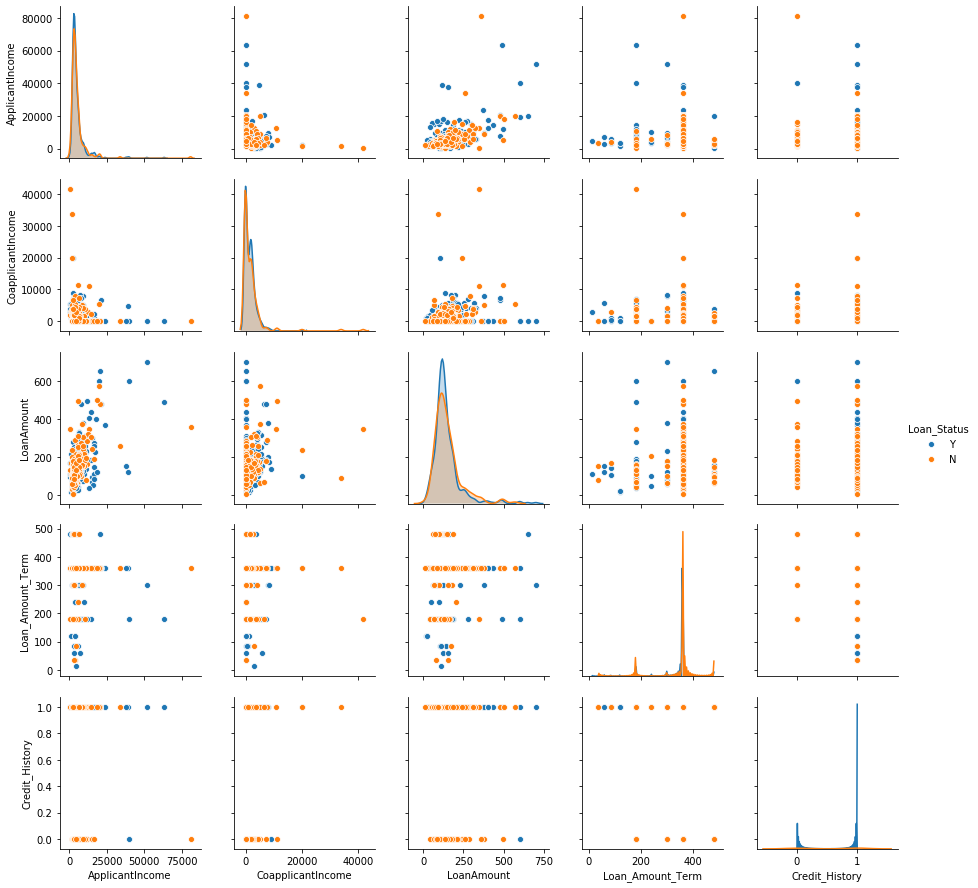

In [19]:
sns.pairplot(db, hue='Loan_Status') 
plt.show()

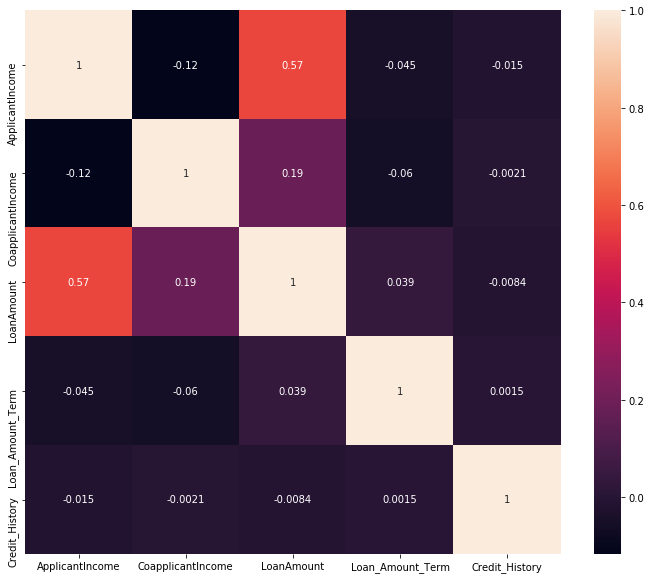

In [20]:
plt.figure(figsize=(12,10))
sns.heatmap(db.corr(),annot=True)

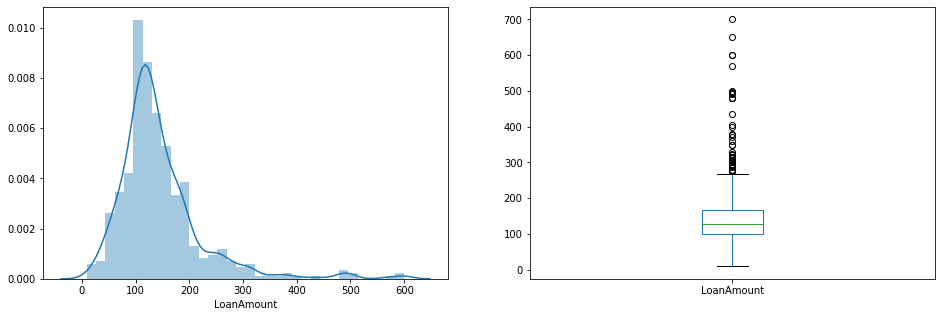

In [21]:
plt.figure(1)
plt.subplot(121)
df=db.dropna()
sns.distplot(df['LoanAmount']);

plt.subplot(122)
db['LoanAmount'].plot.box(figsize=(16,5))

plt.show()

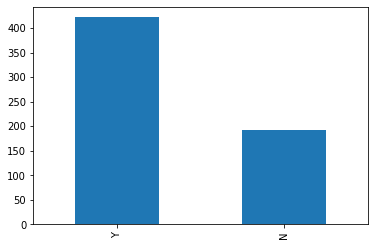

In [22]:
db['Loan_Status'].value_counts().plot.bar()

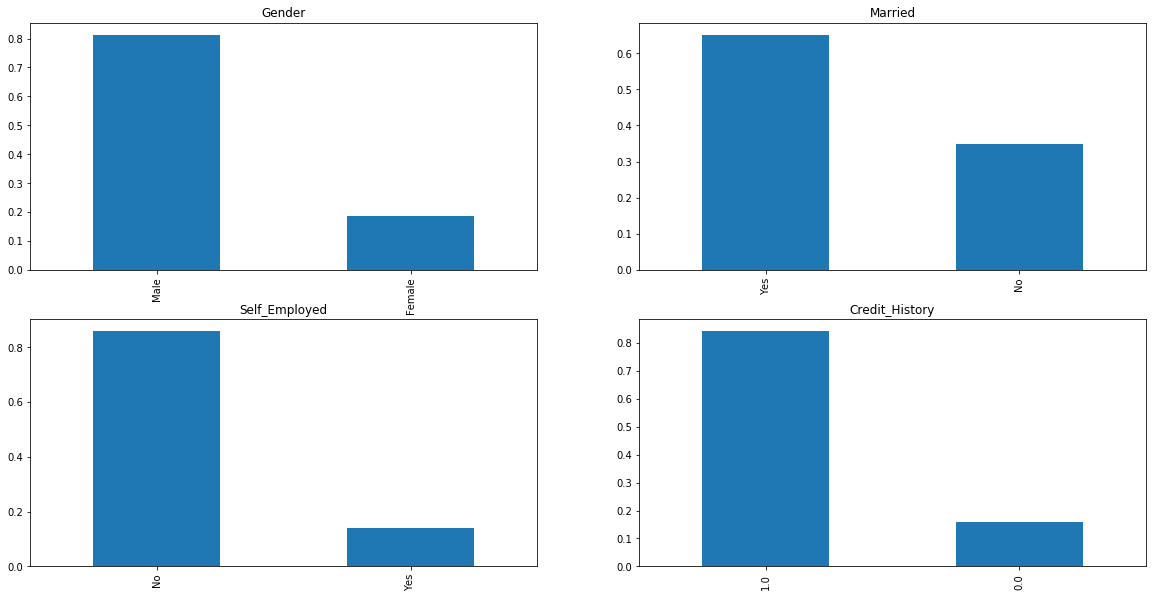

In [23]:
plt.figure(1)
plt.subplot(221)
db['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')

plt.subplot(222)
db['Married'].value_counts(normalize=True).plot.bar(title= 'Married')

plt.subplot(223)
db['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed')

plt.subplot(224)
db['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')

plt.show()

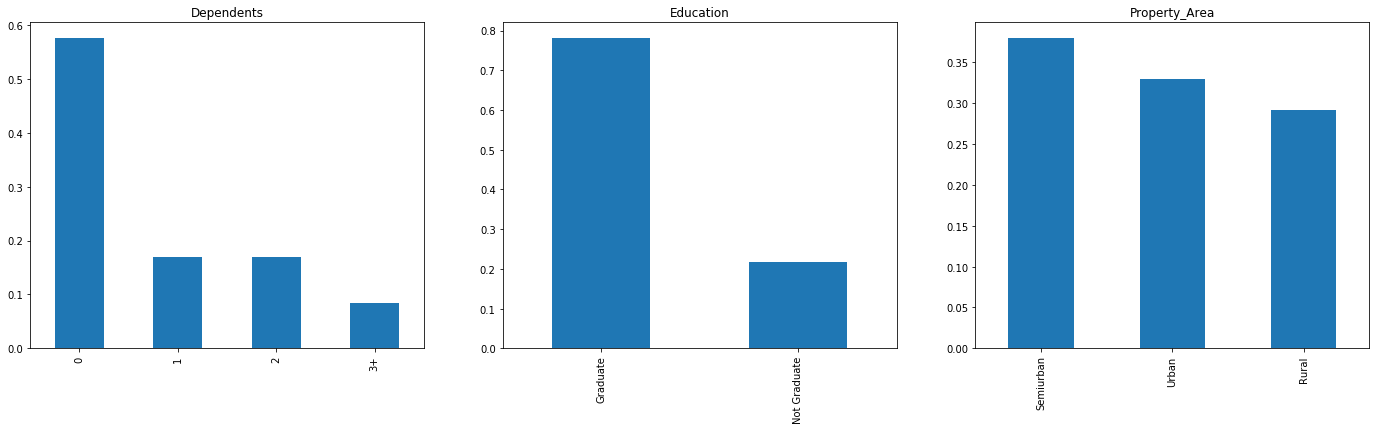

In [24]:
plt.figure(1)
plt.subplot(131)
db['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Dependents')

plt.subplot(132)
db['Education'].value_counts(normalize=True).plot.bar(title= 'Education')

plt.subplot(133)
db['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area')

plt.show()

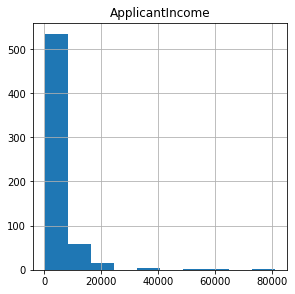

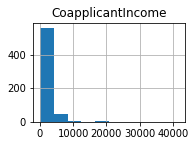

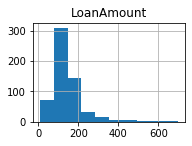

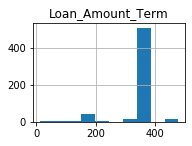

In [25]:
plt.figure(figsize=(10,10))
dfx=db.iloc[:,6:10]
dfy=list(dfx.columns)
counter = 1
for x in dfy:
    plt.subplot(2,2,counter)
    dfx[x].hist()
    plt.title(x)
    plt.show()
    counter = counter + 1

<Figure size 720x720 with 0 Axes>

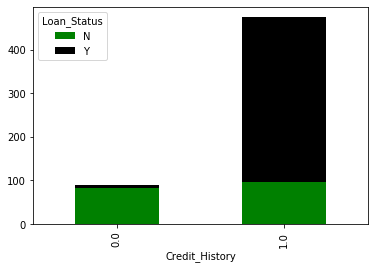

In [26]:
plt.figure(figsize=(10,10))
dfq = pd.crosstab(db['Credit_History'],db['Loan_Status'])
dfq.plot(kind='bar', stacked= True ,color =['green','black'],grid=False)

In [27]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
db['Income_bin']=pd.cut(db['ApplicantIncome'],bins,labels=group)

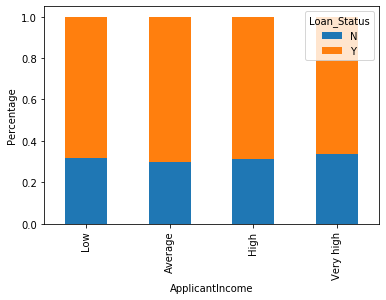

In [28]:
Income_bin=pd.crosstab(db['Income_bin'],db['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('ApplicantIncome')
P = plt.ylabel('Percentage')

In [29]:
db['Dependents'].replace('3+', 3,inplace=True)
db['Loan_Status'].replace('N', 0,inplace=True)
db['Loan_Status'].replace('Y', 1,inplace=True)

In [30]:
db.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1,High
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,High
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,Average
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,High


In [31]:
db.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
Income_bin            0
dtype: int64

### missing value treatment

In [32]:
db['Gender'].fillna(db['Gender'].mode()[0], inplace=True)
db['Married'].fillna(db['Married'].mode()[0], inplace=True)
db['Dependents'].fillna(db['Dependents'].mode()[0], inplace=True)
db['Self_Employed'].fillna(db['Self_Employed'].mode()[0], inplace=True)
db['Credit_History'].fillna(db['Credit_History'].mode()[0], inplace=True)

In [33]:
db['Loan_Amount_Term'].fillna(db['Loan_Amount_Term'].mode()[0], inplace=True)
db['LoanAmount'].fillna(db['LoanAmount'].median(), inplace=True)

In [34]:
db.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Income_bin           0
dtype: int64

In [35]:
db.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1,High
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,High
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,Average
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,High


In [36]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status','Income_bin']
le = LabelEncoder()
for i in var_mod: 
    db[i]=le.fit_transform(db[i])

In [37]:
db.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,1
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1,0
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,0
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,1


In [39]:
X = db.drop(['Loan_Status','Loan_ID'],1)
X['ApplicantIncome'] =   np.cbrt(db.ApplicantIncome)
X['CoapplicantIncome']  =  np.cbrt(db.CoapplicantIncome)
X['LoanAmount']  =  np.cbrt(db.LoanAmount)

y = db.Loan_Status

In [40]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Income_bin
0,1,0,0,0,0,18.017473,0.000000,5.039684,360.0,1.0,2,1
1,1,1,1,0,0,16.610522,11.467457,5.039684,360.0,1.0,0,1
2,1,1,0,0,1,14.422496,0.000000,4.041240,360.0,1.0,2,0
3,1,1,0,1,0,13.720654,13.310098,4.932424,360.0,1.0,2,0
4,1,0,0,0,0,18.171206,0.000000,5.204828,360.0,1.0,2,1


In [41]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [42]:
X.dtypes

Gender                 int32
Married                int32
Dependents            object
Education              int32
Self_Employed          int32
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Income_bin             int32
dtype: object

#### 'Dependents' variable convert into numeric

In [43]:
X['Dependents'] = X['Dependents'].convert_objects(convert_numeric=True)


# Modeling

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size =0.2)

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [126]:
log=LogisticRegression()
log.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [127]:
pred_test = log.predict(x_test)

In [128]:
import math
from sklearn.metrics.classification import accuracy_score
from sklearn.metrics.classification import confusion_matrix
from sklearn.metrics.classification import classification_report 

In [129]:
y_pred = log.predict(x_test)
print("Accuracy:")
print(accuracy_score(y_test, y_pred ))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred ))
print("Classification Report:")
print(classification_report(y_test, y_pred ))

Accuracy:
0.8130081300813008
Confusion Matrix:
[[17 20]
 [ 3 83]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.46      0.60        37
           1       0.81      0.97      0.88        86

    accuracy                           0.81       123
   macro avg       0.83      0.71      0.74       123
weighted avg       0.82      0.81      0.79       123



the accuracy from logistic regression is very good i.e:0.813.

## find best parametrers using gridsearhCV and also check and remove overfitting and underfitting problem by using hyperparameter tuning

In [130]:
def Snippet(model, X_test, y_test,X_train,y_train,parameters): 
    
    print(format('How to find parameters using GridSearchCV  for Regression','*^82'))    
    
    import warnings
    warnings.filterwarnings("ignore")
    
    # load libraries
    #from sklearn import datasets
    #from sklearn.model_selection import train_test_split
    from sklearn.metrics import classification_report
    from sklearn.model_selection import GridSearchCV
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.metrics.classification import accuracy_score
    from sklearn.metrics.classification import confusion_matrix
    #print(model,parameters)
    

    grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 2,refit=True,scoring='f1', n_jobs=-1)
    grid.fit(X_train, y_train)   
    
    y_pred = grid.best_estimator_.predict(X_test)
    train_y_pred = grid.best_estimator_.predict(X_train)
    test_acc = accuracy_score(y_test, y_pred)
    train_acc = accuracy_score(y_train, train_y_pred)
    test_conf = confusion_matrix (y_test, y_pred)
    train_conf = confusion_matrix (y_train, train_y_pred)
    
    class_report = classification_report(y_test,y_pred)
    y_pred_prob = grid.best_estimator_.predict_proba(X_test)[:,1]
    plt.hist(y_pred_prob,bins=10)
    plt.xlim(0,1)
    plt.xlabel("Predicted Proababilities")
    plt.ylabel("Frequency")
   
    # Results from Grid Search
    print("\n========================================================")
    print(" Results from Grid Search " )
    print("========================================================")    
    
    print("\n The best estimator across ALL searched params:\n",
          grid.best_estimator_)
    
    print("\n The best score across ALL searched params:\n",
          grid.best_score_)
    
    print("\n The best parameters across ALL searched params:\n",
          grid.best_params_)
                                    
    print("\n The train_accuracy across ALL models:\n",
          train_acc)
                                    
    print("\n The test_accuracy across ALL models:\n",
          test_acc) 
    print("\n The train_confusion matrix across ALL models:\n",
          train_conf) 
    print("\n The test_confusion matrix across ALL models:\n",
          test_conf) 
    
    print("\n classification report across ALL models:\n",
          class_report) 
    
    print (plt.show())
    
    print("\n ========================================================")

************How to find parameters using GridSearchCV  for Regression*************

 Results from Grid Search 

 The best estimator across ALL searched params:
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.02, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.2, verbosity=1)

 The best score across ALL searched params:
 0.8785282258064515

 The best parameters across ALL searched params:
 {'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.2}

 The train_accuracy across ALL models:
 0.8228105906313645

 The test_accuracy across ALL models:
 0.8130081300813008

 The train_confusion matrix across ALL models:
 [[ 

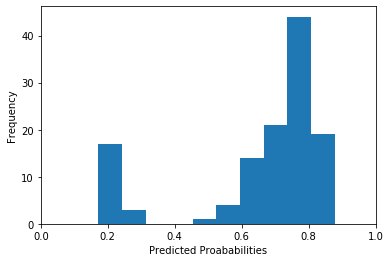

None

************How to find parameters using GridSearchCV  for Regression*************

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=4,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.2, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

 The best score across ALL searched params:
 0.8785282258064515

 The best parameters across ALL searched params:
 {'learning_rate': 0

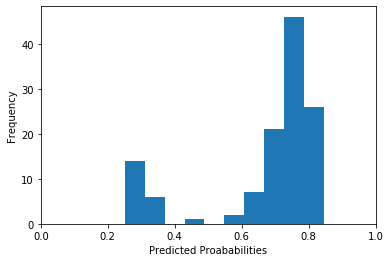

None

************How to find parameters using GridSearchCV  for Regression*************

 Results from Grid Search 

 The best estimator across ALL searched params:
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

 The best score across ALL searched params:
 0.8773318811438784

 The best parameters across ALL searched params:
 {'max_depth': 4, 'max_features': 'auto', 'min_samples_split': 3}

 The train_accuracy across ALL models:
 0.814663951120163

 The test_accuracy across ALL models:
 0.8048780

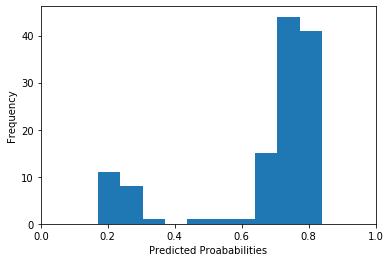

None

************How to find parameters using GridSearchCV  for Regression*************

 Results from Grid Search 

 The best estimator across ALL searched params:
 SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

 The best score across ALL searched params:
 0.876209045646043

 The best parameters across ALL searched params:
 {'C': 1, 'kernel': 'linear'}

 The train_accuracy across ALL models:
 0.8085539714867617

 The test_accuracy across ALL models:
 0.8130081300813008

 The train_confusion matrix across ALL models:
 [[ 65  90]
 [  4 332]]

 The test_confusion matrix across ALL models:
 [[17 20]
 [ 3 83]]

 classification report across ALL models:
               precision    recall  f1-score   support

           0       0.85      0.46      0.60        37
           1       0.81     

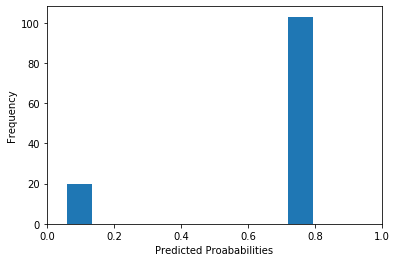

None



In [131]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
alg = [XGBClassifier(),GradientBoostingClassifier(), RandomForestClassifier(),SVC(probability=True)]
parameters = [{'learning_rate': [0.01,0.02,0.03],
                  'subsample'    : [0.9, 0.5, 0.2],
                  'n_estimators' : [100,500,1000],
                  'max_depth'    : [4,6,8]},
              
              {'learning_rate': [0.01,0.02,0.03],
                  'subsample'    : [0.9, 0.5, 0.2],
                  'n_estimators' : [100,500,1000],
                  'max_depth'    : [4,6,8]},
              
              { 'max_depth'    : [4,6,8],
                  'min_samples_split' : [2,3,4],
                  'max_features'    : ['auto','sqrt','log2']},
              
              {'kernel':['linear', 'rbf'], 
                'C':[1, 10]}
             ]


for i in range(len(alg)):
    #print(alg[i])
                              
    Snippet(alg[i] ,x_test, y_test,x_train,y_train,parameters[i])

#### here , we can see that the XGBBoosting model has best score and their actual and predicted accuracy are nearby same as campare to other models.

### bar plot of features importances

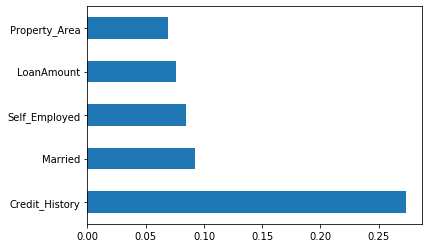

In [46]:
from xgboost import XGBClassifier
model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.02, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.2, verbosity=1)
model.fit(x_train,y_train)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances = feat_importances.nlargest()
feat_importances.plot(kind='barh')

#### from this graph we can see that the most important feature for this model is 'credit_history'.

## save model

In [47]:
import pickle

In [48]:
filename='loan_prediction-intervention_XGBClassifier_model.sav'

In [49]:
pickle.dump(model, open(filename, 'wb'))

In [50]:
load_lr_model =pickle.load(open(filename, 'rb'))